# Lead Scoring Case Study

## Problem Statement
An X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#library for train_test_split
import sklearn
from sklearn.model_selection import train_test_split
#library for minmaxscaler
from sklearn.preprocessing import MinMaxScaler
# Importing RFE and LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Importing metrics from sklearn for evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# for modelling
import statsmodels.api as sm  
# for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

### 1. Reading and Understanding the Data

In [2]:
#load the file to the dataset
Lead = pd.read_csv('Leads.csv')
Lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
Lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [4]:
# removing Sales team imputed colunms like 'Tags', 'Lead Quality','Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score','Asymmetrique Profile Score','Last Activity', 'Last Notable Activity'
Lead.drop(['Tags', 'Lead Quality','Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score','Asymmetrique Profile Score','Last Activity', 'Last Notable Activity'], axis=1, inplace=True)
pd.set_option('display.max_columns', 50)
Lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No


### Data Cleaning

#### 1. Replace  Select -> NaN

In [5]:
# Converting all the values to lower case
Lead = Lead.applymap(lambda s:s.lower() if type(s) == str else s)
# Replacing 'Select' with NaN (Since it means no option is selected)
Lead = Lead.replace('select',np.nan)
Lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,NaN,NaN,NaN,unemployed,better career prospects,no,no,no,no,no,no,no,no,no,no,NaN,NaN,no,no
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,india,NaN,NaN,unemployed,better career prospects,no,no,no,no,no,no,no,no,no,no,NaN,NaN,no,no
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,india,business administration,NaN,student,better career prospects,no,no,no,no,no,no,no,no,no,no,potential lead,mumbai,no,yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,india,media and advertising,word of mouth,unemployed,better career prospects,no,no,no,no,no,no,no,no,no,no,NaN,mumbai,no,no
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,india,NaN,other,unemployed,better career prospects,no,no,no,no,no,no,no,no,no,no,NaN,mumbai,no,no


#### 2. Check % of missing Values

In [6]:
# Checking the percentage of missing values
round(100*(Lead.isnull().sum()/len(Lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

How did you hear about X Education, Lead Profile, Specialization, City  has the null value percentage greater than 35%. Thereby, We will remove the columns.

#### 3. Drop Columns with more than 35% Null values

In [7]:
df= Lead.drop(['How did you hear about X Education', 'Lead Profile','Specialization','City'], axis=1)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,NaN,unemployed,better career prospects,no,no,no,no,no,no,no,no,no,no,no,no
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,india,unemployed,better career prospects,no,no,no,no,no,no,no,no,no,no,no,no
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,india,student,better career prospects,no,no,no,no,no,no,no,no,no,no,no,yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,india,unemployed,better career prospects,no,no,no,no,no,no,no,no,no,no,no,no
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,india,unemployed,better career prospects,no,no,no,no,no,no,no,no,no,no,no,no


In [8]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

#### 4. Impute the date for the categorical columns

In [9]:
# 'What matters most to you in choosing a course','Country','What is your current occupation'
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].fillna('na_chosen')
df['Country'] = df['Country'].fillna('na_country')
df['What is your current occupation'] = df['What is your current occupation'].fillna('na_occupation')
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Country                                          0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

#### 5. Drop all the skewed Categorical columns & Combine categories with % less than 10 as Others

In [10]:
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Country                                            39
What is your current occupation                     7
What matters most to you in choosing a course       4
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

As Receive More Updates About Our Courses , Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque , Magazine columns has same value for all the rows in the dataset, these attributes will not be suitable for the analysis. Thereby, we will drop the corresponding columns.

In [11]:
df= df.drop(['Receive More Updates About Our Courses' , 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque' , 'Magazine'], axis=1)
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Country                                            39
What is your current occupation                     7
What matters most to you in choosing a course       4
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations     

In [12]:
round(df['Lead Source'].value_counts()/9240*100,2)

google               31.09
direct traffic       27.52
olark chat           18.99
organic search       12.49
reference             5.78
welingak website      1.54
referral sites        1.35
facebook              0.60
bing                  0.06
click2call            0.04
social media          0.02
live chat             0.02
press_release         0.02
testone               0.01
blog                  0.01
welearnblog_home      0.01
nc_edm                0.01
youtubechannel        0.01
pay per click ads     0.01
welearn               0.01
Name: Lead Source, dtype: float64

In [13]:
#grouping all categories with smaller perecentages
df.loc[(df['Lead Source'] != 'google') & (df['Lead Source'] != 'direct traffic')& (df['Lead Source'] != 'olark chat') & (df['Lead Source'] != 'organic search'), 'Lead Source'] = 'Other_LeadSource'
round(df['Lead Source'].value_counts()/9240*100,2)

google              31.09
direct traffic      27.52
olark chat          18.99
organic search      12.49
Other_LeadSource     9.90
Name: Lead Source, dtype: float64

In [14]:
round(df['Lead Origin'].value_counts()/9240*100,2)

landing page submission    52.88
api                        38.74
lead add form               7.77
lead import                 0.60
quick add form              0.01
Name: Lead Origin, dtype: float64

In [15]:
#grouping the categories with smaller perecentages
df.loc[(df['Lead Origin'] != 'landing page submission') & (df['Lead Origin'] != 'api'), 'Lead Origin'] = 'Other_LeadOrigin'
round(df['Lead Origin'].value_counts()/9240*100,2)

landing page submission    52.88
api                        38.74
Other_LeadOrigin            8.38
Name: Lead Origin, dtype: float64

In [16]:
round(df['Country'].value_counts()/9240*100,2)

india                   70.26
na_country              26.63
united states            0.75
united arab emirates     0.57
singapore                0.26
saudi arabia             0.23
united kingdom           0.16
australia                0.14
qatar                    0.11
hong kong                0.08
bahrain                  0.08
oman                     0.06
france                   0.06
unknown                  0.05
nigeria                  0.04
south africa             0.04
kuwait                   0.04
germany                  0.04
canada                   0.04
sweden                   0.03
bangladesh               0.02
china                    0.02
italy                    0.02
philippines              0.02
netherlands              0.02
belgium                  0.02
ghana                    0.02
uganda                   0.02
asia/pacific region      0.02
liberia                  0.01
denmark                  0.01
kenya                    0.01
vietnam                  0.01
switzerlan

In [17]:
#grouping the categories with smaller perecentages
df.loc[(df['Country'] != 'india') & (df['Country'] != 'na_country') , 'Country'] = 'Outside_India'
round(df['Country'].value_counts()/9240*100,2)

india            70.26
na_country       26.63
Outside_India     3.11
Name: Country, dtype: float64

In [18]:
#What is your current occupation
round(df['What is your current occupation'].value_counts()/9240*100,2)

unemployed              60.61
na_occupation           29.11
working professional     7.64
student                  2.27
other                    0.17
housewife                0.11
businessman              0.09
Name: What is your current occupation, dtype: float64

In [19]:
#grouping the categories with smaller perecentages
df.loc[(df['What is your current occupation'] != 'unemployed') & (df['What is your current occupation'] != 'na_occupation') , 'What is your current occupation'] = 'other_occupation'
round(df['What is your current occupation'].value_counts()/9240*100,2)

unemployed          60.61
na_occupation       29.11
other_occupation    10.28
Name: What is your current occupation, dtype: float64

In [20]:
round(df['What matters most to you in choosing a course'].value_counts()/9240*100,2)

better career prospects      70.65
na_chosen                    29.32
flexibility & convenience     0.02
other                         0.01
Name: What matters most to you in choosing a course, dtype: float64

In [21]:
#grouping the categories with smaller perecentages
df.loc[(df['What matters most to you in choosing a course'] != 'na_chosen') , 'What matters most to you in choosing a course'] = 'better career prospects and flexiblity'
round(df['What matters most to you in choosing a course'].value_counts()/9240*100,2)

better career prospects and flexiblity    70.68
na_chosen                                 29.32
Name: What matters most to you in choosing a course, dtype: float64

In [22]:
round(df['Search'].value_counts()/9240*100,2)

no     99.85
yes     0.15
Name: Search, dtype: float64

In [23]:
round(df['Newspaper Article'].value_counts()/9240*100,2)

no     99.98
yes     0.02
Name: Newspaper Article, dtype: float64

In [24]:
#Do Not Call is skewed and hence this has to be removed
round(df['Do Not Call'].value_counts()/9240*100,2)

no     99.98
yes     0.02
Name: Do Not Call, dtype: float64

In [25]:
#X Education Forums
round(df['X Education Forums'].value_counts()/9240*100,2)

no     99.99
yes     0.01
Name: X Education Forums, dtype: float64

In [26]:
round(df['Newspaper'].value_counts()/9240*100,2)
#df.nunique()

no     99.99
yes     0.01
Name: Newspaper, dtype: float64

In [27]:
round(df['Digital Advertisement'].value_counts()/9240*100,2)

no     99.96
yes     0.04
Name: Digital Advertisement, dtype: float64

In [28]:
round(df['Through Recommendations'].value_counts()/9240*100,2)

no     99.92
yes     0.08
Name: Through Recommendations, dtype: float64

In [29]:
round(df['A free copy of Mastering The Interview'].value_counts()/9240*100,2)

no     68.74
yes    31.26
Name: A free copy of Mastering The Interview, dtype: float64

In [30]:
round(df['Do Not Email'].value_counts()/9240*100,2)

no     92.06
yes     7.94
Name: Do Not Email, dtype: float64

In [31]:
#dropping the columns which are highly skewed
df_final= df.drop(['Search','Newspaper Article','Do Not Call','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'], axis=1)

In [32]:
round(100*(df_final.isnull().sum()/len(df_final.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Country                                          0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
A free copy of Mastering The Interview           0.00
dtype: float64

In [33]:
# remove the rows which has null values and 1.48% is negligible
df_final = df_final[df_final.isnull().sum(axis=1) <1]

In [34]:
round(100*(df_final.isnull().sum()/len(df_final.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
A free copy of Mastering The Interview           0.0
dtype: float64

#### 6. Report the percentage of rows in df_final by inital

In [35]:
round(100*(df_final.shape[0])/(df.shape[0]),2)

98.52

After data cleaning, We proceed with the 98.52% of the rows for development of the model.

#### 7. Handling Outlier

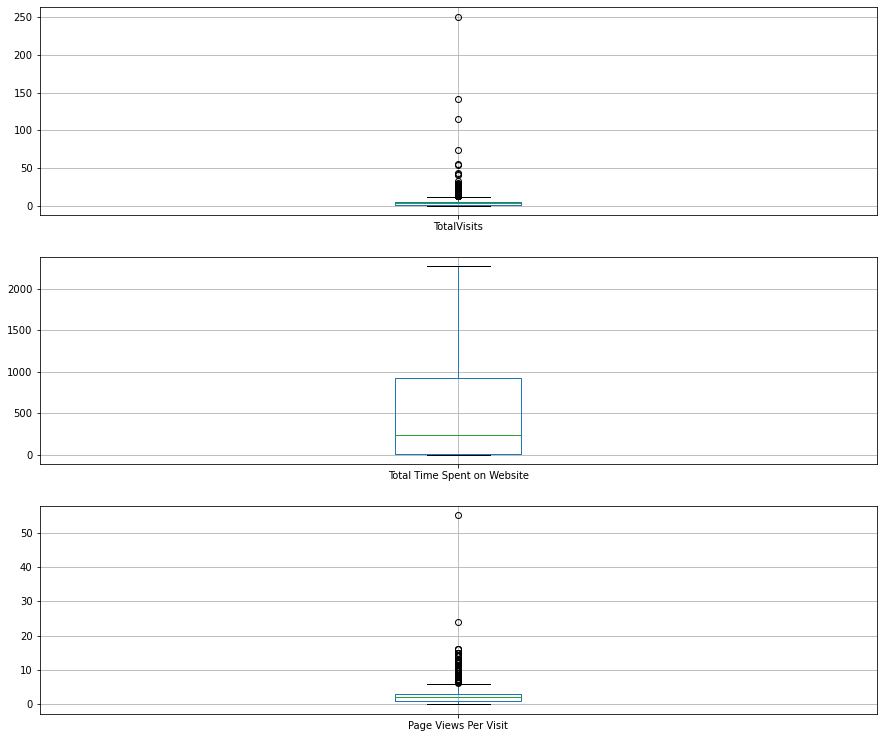

In [36]:
plt.figure(figsize = (15, 13))
plt.subplot(3,1,1)
df_final.boxplot('TotalVisits')
plt.subplot(3,1,2)
df_final.boxplot('Total Time Spent on Website')
plt.subplot(3,1,3)
df_final.boxplot('Page Views Per Visit')
plt.show()

From the above graphs, we could clearly see the Total Visits and Page views per visit has outilers and this has to be handled by capping.

In [37]:
#soft capping is done the outliers
q1 = df_final['TotalVisits'].quantile(0.99) #17.0
q2 = df_final['Page Views Per Visit'].quantile(0.99) #9.0
df_final['TotalVisits'][df_final['TotalVisits'] > q1] = q1
df_final['Page Views Per Visit'][df_final['Page Views Per Visit'] > q2] = q2

## 2. Data Preparation

In [38]:
df_final.nunique()

Prospect ID                                      9103
Lead Number                                      9103
Lead Origin                                         3
Lead Source                                         5
Do Not Email                                        2
Converted                                           2
TotalVisits                                        18
Total Time Spent on Website                      1717
Page Views Per Visit                              102
Country                                             3
What is your current occupation                     3
What matters most to you in choosing a course       2
A free copy of Mastering The Interview              2
dtype: int64

In [39]:
df_final.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,0,0.0,0,0.0,na_country,unemployed,better career prospects and flexiblity,no
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,0,5.0,674,2.5,india,unemployed,better career prospects and flexiblity,no
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,1,2.0,1532,2.0,india,other_occupation,better career prospects and flexiblity,yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,0,1.0,305,1.0,india,unemployed,better career prospects and flexiblity,no
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,1,2.0,1428,1.0,india,unemployed,better career prospects and flexiblity,no


In [40]:
# replacing strings by flags
df_final['Do Not Email'].replace({'yes':1,'no':0},inplace= True)
df_final['A free copy of Mastering The Interview'].replace({'yes':1,'no':0},inplace= True)
df_final.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,0,0,0.0,0,0.0,na_country,unemployed,better career prospects and flexiblity,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,0,0,5.0,674,2.5,india,unemployed,better career prospects and flexiblity,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,0,1,2.0,1532,2.0,india,other_occupation,better career prospects and flexiblity,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,0,0,1.0,305,1.0,india,unemployed,better career prospects and flexiblity,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,0,1,2.0,1428,1.0,india,unemployed,better career prospects and flexiblity,0


In [41]:
#Prospect ID and Lead Number columns are for identification of the leads, thereby droping it prior to the modelling
df_final.drop(['Prospect ID','Lead Number'], axis=1, inplace=True)
df_final.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview
0,api,olark chat,0,0,0.0,0,0.0,na_country,unemployed,better career prospects and flexiblity,0
1,api,organic search,0,0,5.0,674,2.5,india,unemployed,better career prospects and flexiblity,0
2,landing page submission,direct traffic,0,1,2.0,1532,2.0,india,other_occupation,better career prospects and flexiblity,1
3,landing page submission,direct traffic,0,0,1.0,305,1.0,india,unemployed,better career prospects and flexiblity,0
4,landing page submission,google,0,1,2.0,1428,1.0,india,unemployed,better career prospects and flexiblity,0


In [42]:
LeadOrigin= pd.get_dummies(df_final['Lead Origin'], drop_first=True)
LeadSource= pd.get_dummies(df_final['Lead Source'], drop_first=True)
Country= pd.get_dummies(df_final['Country'], drop_first=True)
Occupation= pd.get_dummies(df_final['What is your current occupation'], drop_first=True)
Choose= pd.get_dummies(df_final['What matters most to you in choosing a course'], drop_first=True)
final = pd.concat([df_final ,LeadOrigin,LeadSource ,Country , Occupation, Choose], axis=1)
final.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,api,landing page submission,direct traffic,google,olark chat,organic search,india,na_country,other_occupation,unemployed,na_chosen
0,api,olark chat,0,0,0.0,0,0.0,na_country,unemployed,better career prospects and flexiblity,0,1,0,0,0,1,0,0,1,0,1,0
1,api,organic search,0,0,5.0,674,2.5,india,unemployed,better career prospects and flexiblity,0,1,0,0,0,0,1,1,0,0,1,0
2,landing page submission,direct traffic,0,1,2.0,1532,2.0,india,other_occupation,better career prospects and flexiblity,1,0,1,1,0,0,0,1,0,1,0,0
3,landing page submission,direct traffic,0,0,1.0,305,1.0,india,unemployed,better career prospects and flexiblity,0,0,1,1,0,0,0,1,0,0,1,0
4,landing page submission,google,0,1,2.0,1428,1.0,india,unemployed,better career prospects and flexiblity,0,0,1,0,1,0,0,1,0,0,1,0


In [43]:
final.drop(['Lead Origin', 'Lead Source','Country', 'What is your current occupation','What matters most to you in choosing a course'],axis=1 , inplace=True)
final.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,api,landing page submission,direct traffic,google,olark chat,organic search,india,na_country,other_occupation,unemployed,na_chosen
0,0,0,0.0,0,0.0,0,1,0,0,0,1,0,0,1,0,1,0
1,0,0,5.0,674,2.5,0,1,0,0,0,0,1,1,0,0,1,0
2,0,1,2.0,1532,2.0,1,0,1,1,0,0,0,1,0,1,0,0
3,0,0,1.0,305,1.0,0,0,1,1,0,0,0,1,0,0,1,0
4,0,1,2.0,1428,1.0,0,0,1,0,1,0,0,1,0,0,1,0


## 3. Splitting the Data into Training and Testing Sets

In [44]:
f_train,f_test = train_test_split(final, train_size=0.7, random_state=100)
print(f_train.shape)
print(f_test.shape)

(6372, 17)
(2731, 17)


In [45]:
#initalize an object
scaler= MinMaxScaler()
#variables to be scaled
nvar = ['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']
#fit and transform the data using scaler
f_train[nvar]=scaler.fit_transform(f_train[nvar])
f_train.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,api,landing page submission,direct traffic,google,olark chat,organic search,india,na_country,other_occupation,unemployed,na_chosen
7962,0,0,0.176471,0.570794,0.166667,0,0,1,0,1,0,0,1,0,0,1,0
5520,0,0,0.411765,0.026631,0.777778,0,0,1,1,0,0,0,1,0,0,1,0
1962,0,0,0.294118,0.075011,0.277778,0,0,1,0,1,0,0,1,0,0,1,0
1566,0,1,0.823529,0.550821,0.388889,0,0,1,0,1,0,0,1,0,1,0,0
9170,0,0,0.000000,0.000000,0.000000,0,1,0,0,0,1,0,0,1,0,1,0


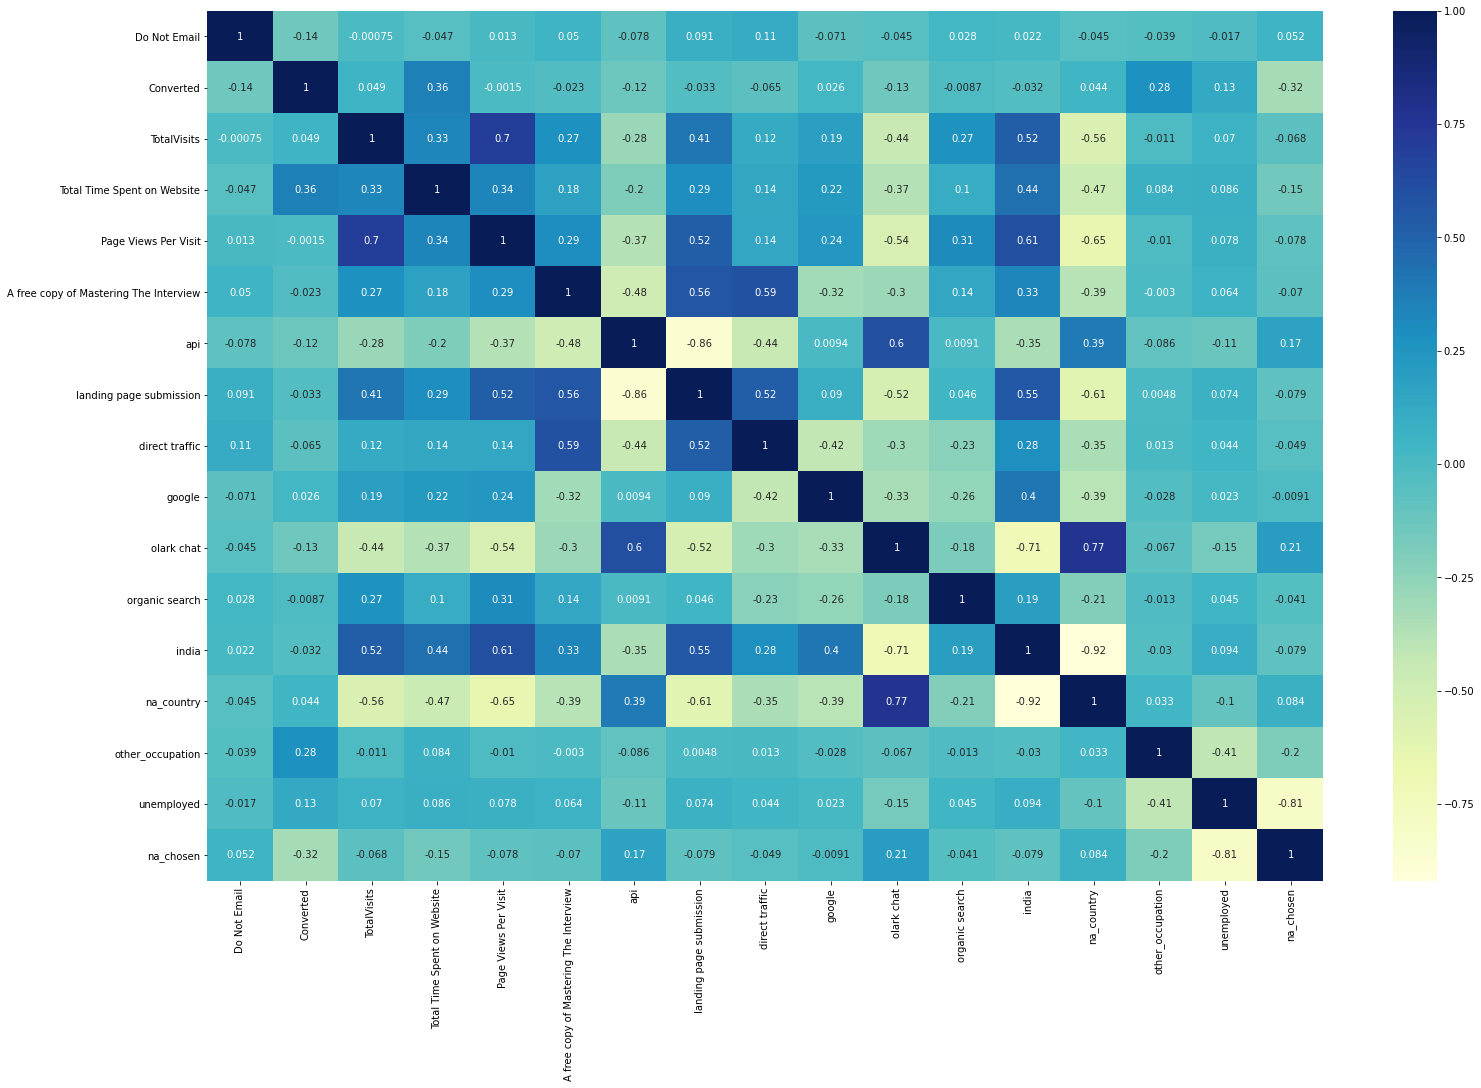

In [46]:
#correlation plot of all variables in train
plt.figure(figsize = (25, 16))
sns.heatmap(f_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

From the above correlation plot, We could see that Time spent on the website and Other occupation are more postively correlated and na_chosen is more negatively corrleated with converted values. These variables should help more in determining the potential leads.

In [47]:
#divide into X and y sets
y_train = f_train.pop('Converted')
X_train = f_train

### 4 Creation of a model

In [48]:
# Running RFE with the output number of the variable equal to 15
lm = LogisticRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [49]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', True, 1),
 ('api', True, 1),
 ('landing page submission', True, 1),
 ('direct traffic', True, 1),
 ('google', True, 1),
 ('olark chat', True, 1),
 ('organic search', True, 1),
 ('india', False, 2),
 ('na_country', True, 1),
 ('other_occupation', True, 1),
 ('unemployed', True, 1),
 ('na_chosen', True, 1)]

In [50]:
# add the 15 columns selected by RFE to the variable col
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview', 'api',
       'landing page submission', 'direct traffic', 'google', 'olark chat',
       'organic search', 'na_country', 'other_occupation', 'unemployed',
       'na_chosen'],
      dtype='object')

In [51]:
# Creating X_test dataframe with RFE selected  15 variables
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2922.3
Date:                Mon, 07 Dec 2020   Deviance:                       5844.6
Time:                        17:19:38   Pearson chi2:                 6.25e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     22.6391   1.19e+04      0.002      0.998   -2.33e+04    2.34e+04
Do Not Email                              -1.2073      0.152     -7.955      0.000      -1.505      -0.910
TotalVisits                                1.2156      0.236      5.152      0.000       0.753       1.678
Total Time Spent on Website                4.5736      0.160     28.626      0.000       4.260       4.887
Page Views Per Visit                      -0.3527      0.237     -1.486      0.137      -0.818       0.113
A free copy of Mastering The Interview     0.0268      0.101      0.266      0.790      -0.171       0.225
api                                       -3.6822      0.402     -9.169      0.000      -4.469      -2.895
landing page submission                   -3.6926      0.409     -9.029      0.000      -4.494      -2.891
direct traffic                             0.2615      0.307      0.852      0.394      -0.340       0.863
google                                     0.5486      0.297      1.845      0.065      -0.034       1.132
olark chat                                 0.8661      0.370      2.344      0.019       0.142       1.590
organic search                             0.3634      0.304      1.194      0.233      -0.233       0.960
na_country                                 0.6506      0.239      2.724      0.006       0.183       1.119
other_occupation                         -19.6919   1.19e+04     -0.002      0.999   -2.34e+04    2.33e+04
unemployed                               -21.2809   1.19e+04     -0.002      0.999   -2.34e+04    2.33e+04
na_chosen                                -22.5955   1.19e+04     -0.002      0.998   -2.34e+04    2.33e+04
==========================================================================================================
"""

In [52]:
# removing other_occupation which has high p value
X_train_sm=X_train_sm.drop(['other_occupation'],axis=1)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2923.1
Date:                Mon, 07 Dec 2020   Deviance:                       5846.3
Time:                        17:19:40   Pearson chi2:                 6.26e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      2.9450      0.306      9.622      0.000       2.345       3.545
Do Not Email                              -1.2149      0.152     -8.015      0.000      -1.512      -0.918
TotalVisits                                1.2159      0.236      5.152      0.000       0.753       1.679
Total Time Spent on Website                4.5732      0.160     28.633      0.000       4.260       4.886
Page Views Per Visit                      -0.3485      0.237     -1.468      0.142      -0.814       0.117
A free copy of Mastering The Interview     0.0328      0.101      0.325      0.745      -0.165       0.230
api                                       -3.6810      0.402     -9.165      0.000      -4.468      -2.894
landing page submission                   -3.6942      0.409     -9.031      0.000      -4.496      -2.892
direct traffic                             0.2578      0.307      0.840      0.401      -0.344       0.859
google                                     0.5508      0.297      1.852      0.064      -0.032       1.134
olark chat                                 0.8654      0.370      2.341      0.019       0.141       1.590
organic search                             0.3628      0.304      1.192      0.233      -0.234       0.960
na_country                                 0.6541      0.239      2.739      0.006       0.186       1.122
unemployed                                -1.5894      0.120    -13.224      0.000      -1.825      -1.354
na_chosen                                 -2.9084      0.136    -21.335      0.000      -3.176      -2.641
==========================================================================================================
"""

In [53]:
# Removing A free copy of Mastering The Interview as it has higher p value
X_train_sm=X_train_sm.drop(['A free copy of Mastering The Interview'],axis=1)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2923.2
Date:                Mon, 07 Dec 2020   Deviance:                       5846.4
Time:                        17:19:41   Pearson chi2:                 6.26e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           2.9572      0.304      9.737      0.000       2.362       3.552
Do Not Email                   -1.2169      0.151     -8.033      0.000      -1.514      -0.920
TotalVisits                     1.2225      0.235      5.200      0.000       0.762       1.683
Total Time Spent on Website     4.5737      0.160     28.637      0.000       4.261       4.887
Page Views Per Visit           -0.3511      0.237     -1.480      0.139      -0.816       0.114
api                            -3.6920      0.400     -9.225      0.000      -4.476      -2.908
landing page submission        -3.6946      0.409     -9.033      0.000      -4.496      -2.893
direct traffic                  0.2708      0.304      0.890      0.374      -0.326       0.867
google                          0.5454      0.297      1.837      0.066      -0.037       1.127
olark chat                      0.8766      0.368      2.382      0.017       0.155       1.598
organic search                  0.3701      0.304      1.219      0.223      -0.225       0.965
na_country                      0.6420      0.236      2.722      0.006       0.180       1.104
unemployed                     -1.5891      0.120    -13.223      0.000      -1.825      -1.354
na_chosen                      -2.9083      0.136    -21.336      0.000      -3.175      -2.641
===============================================================================================
"""

In [54]:
#removing direct traffic as it has high p value
X_train_sm=X_train_sm.drop(['direct traffic'],axis=1)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2923.6
Date:                Mon, 07 Dec 2020   Deviance:                       5847.2
Time:                        17:19:42   Pearson chi2:                 6.25e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           2.9660      0.304      9.770      0.000       2.371       3.561
Do Not Email                   -1.2140      0.151     -8.015      0.000      -1.511      -0.917
TotalVisits                     1.2124      0.235      5.164      0.000       0.752       1.673
Total Time Spent on Website     4.5764      0.160     28.655      0.000       4.263       4.889
Page Views Per Visit           -0.3696      0.236     -1.563      0.118      -0.833       0.094
api                            -3.4516      0.294    -11.745      0.000      -4.028      -2.876
landing page submission        -3.4352      0.286    -11.997      0.000      -3.996      -2.874
google                          0.2938      0.088      3.340      0.001       0.121       0.466
olark chat                      0.6366      0.249      2.559      0.011       0.149       1.124
organic search                  0.1214      0.116      1.044      0.296      -0.106       0.349
na_country                      0.6341      0.236      2.690      0.007       0.172       1.096
unemployed                     -1.5902      0.120    -13.229      0.000      -1.826      -1.355
na_chosen                      -2.9108      0.136    -21.355      0.000      -3.178      -2.644
===============================================================================================
"""

In [55]:
#removing organic search as it has high p value
X_train_sm=X_train_sm.drop(['organic search'],axis=1)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6360
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2924.1
Date:                Mon, 07 Dec 2020   Deviance:                       5848.3
Time:                        17:19:43   Pearson chi2:                 6.26e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           2.9572      0.303      9.747      0.000       2.363       3.552
Do Not Email                   -1.2144      0.151     -8.017      0.000      -1.511      -0.918
TotalVisits                     1.2329      0.234      5.272      0.000       0.775       1.691
Total Time Spent on Website     4.5768      0.160     28.654      0.000       4.264       4.890
Page Views Per Visit           -0.3237      0.232     -1.394      0.163      -0.779       0.131
api                            -3.4026      0.290    -11.733      0.000      -3.971      -2.834
landing page submission        -3.4162      0.286    -11.958      0.000      -3.976      -2.856
google                          0.2502      0.077      3.237      0.001       0.099       0.402
olark chat                      0.5874      0.244      2.405      0.016       0.109       1.066
na_country                      0.6417      0.236      2.724      0.006       0.180       1.103
unemployed                     -1.5888      0.120    -13.220      0.000      -1.824      -1.353
na_chosen                      -2.9108      0.136    -21.356      0.000      -3.178      -2.644
===============================================================================================
"""

In [56]:
#removing Page Views Per Visit as it has high p value
X_train_sm=X_train_sm.drop(['Page Views Per Visit'],axis=1)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6361
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2925.1
Date:                Mon, 07 Dec 2020   Deviance:                       5850.2
Time:                        17:19:44   Pearson chi2:                 6.26e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           2.9461      0.303      9.718      0.000       2.352       3.540
Do Not Email                   -1.2121      0.152     -8.000      0.000      -1.509      -0.915
TotalVisits                     1.0642      0.200      5.319      0.000       0.672       1.456
Total Time Spent on Website     4.5760      0.160     28.650      0.000       4.263       4.889
api                            -3.4481      0.288    -11.971      0.000      -4.013      -2.884
landing page submission        -3.4795      0.282    -12.341      0.000      -4.032      -2.927
google                          0.2485      0.077      3.218      0.001       0.097       0.400
olark chat                      0.6319      0.242      2.612      0.009       0.158       1.106
na_country                      0.6498      0.235      2.761      0.006       0.189       1.111
unemployed                     -1.5868      0.120    -13.196      0.000      -1.822      -1.351
na_chosen                      -2.9066      0.136    -21.327      0.000      -3.174      -2.639
===============================================================================================
"""

In [57]:
vif = pd.DataFrame()
X = X_train_sm.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,landing page submission,8.30
3,api,7.69
8,unemployed,6.64
6,olark chat,5.42
9,na_chosen,4.07
7,na_country,4.00
1,TotalVisits,2.99
2,Total Time Spent on Website,2.30
5,google,1.90
0,Do Not Email,1.12


In [58]:
#removing landing page submission as it has high VIF value
X_train_sm=X_train_sm.drop(['landing page submission'],axis=1)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6362
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3007.4
Date:                Mon, 07 Dec 2020   Deviance:                       6014.8
Time:                        17:19:46   Pearson chi2:                 6.56e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.3799      0.136     -2.799      0.005      -0.646      -0.114
Do Not Email                   -1.2478      0.149     -8.394      0.000      -1.539      -0.956
TotalVisits                     0.8754      0.199      4.394      0.000       0.485       1.266
Total Time Spent on Website     4.5580      0.160     28.514      0.000       4.245       4.871
api                            -0.0538      0.086     -0.623      0.533      -0.223       0.115
google                          0.1573      0.077      2.046      0.041       0.007       0.308
olark chat                     -1.8341      0.161    -11.407      0.000      -2.149      -1.519
na_country                      3.1777      0.147     21.639      0.000       2.890       3.466
unemployed                     -1.5608      0.118    -13.198      0.000      -1.793      -1.329
na_chosen                      -2.9503      0.135    -21.871      0.000      -3.215      -2.686
===============================================================================================
"""

In [59]:
#removing api as it has high p value
X_train_sm=X_train_sm.drop(['api'],axis=1)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6363
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3007.6
Date:                Mon, 07 Dec 2020   Deviance:                       6015.2
Time:                        17:19:47   Pearson chi2:                 6.57e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.3902      0.135     -2.896      0.004      -0.654      -0.126
Do Not Email                   -1.2453      0.149     -8.380      0.000      -1.537      -0.954
TotalVisits                     0.8863      0.198      4.468      0.000       0.497       1.275
Total Time Spent on Website     4.5590      0.160     28.524      0.000       4.246       4.872
google                          0.1461      0.075      1.954      0.051      -0.000       0.293
olark chat                     -1.8855      0.138    -13.657      0.000      -2.156      -1.615
na_country                      3.1885      0.146     21.855      0.000       2.903       3.474
unemployed                     -1.5633      0.118    -13.224      0.000      -1.795      -1.332
na_chosen                      -2.9543      0.135    -21.922      0.000      -3.218      -2.690
===============================================================================================
"""

In [60]:
vif = pd.DataFrame()
X = X_train_sm.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,na_country,3.56
4,olark chat,3.23
6,unemployed,3.14
1,TotalVisits,2.57
7,na_chosen,2.13
2,Total Time Spent on Website,2.05
3,google,1.67
0,Do Not Email,1.10


Now we have got the model with eight efficient parameters help in deciding the potential leads.

In [61]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.72136932, 0.18738377, 0.23063147, 0.95243802, 0.34288616,
       0.11491288, 0.27651491, 0.26609291, 0.11491288, 0.62257476])

In [62]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.721369
1,0,0.187384
2,0,0.230631
3,1,0.952438
4,0,0.342886


### 5. Model Evaluation

#### Optimial Probablity Cut Off (ROC Curve)

In [63]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

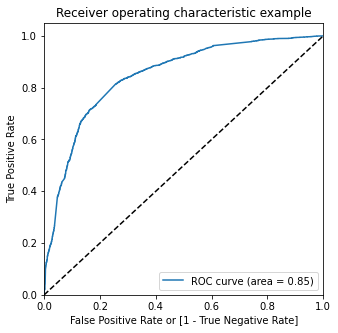

In [64]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [65]:
# Creating columns with different probability cutoffs 
numbers = [0.0,0.1,0.2,0.3,0.342886,0.4,0.45,0.5,0.55,0.6,0.7,0.8,0.9]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,0.0,0.1,0.2,0.3,0.342886,0.4,0.45,0.5,0.55,0.6,0.7,0.8,0.9
0,0,0.721369,1,1,1,1,1,1,1,1,1,1,1,0,0
1,0,0.187384,1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0.230631,1,1,1,0,0,0,0,0,0,0,0,0,0
3,1,0.952438,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.342886,1,1,1,1,1,0,0,0,0,0,0,0,0


In [66]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.342886,0.4,0.45,0.5,0.55,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

              prob  accuracy     sensi     speci
0.000000  0.000000  0.379630  1.000000  0.000000
0.100000  0.100000  0.523070  0.980570  0.243107
0.200000  0.200000  0.681576  0.906160  0.544144
0.300000  0.300000  0.758632  0.835883  0.711358
0.342886  0.342886  0.771030  0.813973  0.744751
0.400000  0.400000  0.790176  0.707317  0.840880
0.450000  0.450000  0.791902  0.680860  0.859853
0.500000  0.500000  0.787979  0.644481  0.875791
0.550000  0.550000  0.780446  0.604795  0.887933
0.600000  0.600000  0.770088  0.557668  0.900076
0.700000  0.700000  0.749058  0.461761  0.924867
0.800000  0.800000  0.690050  0.235635  0.968125
0.900000  0.900000  0.663371  0.126499  0.991905


<Figure size 1800x360 with 0 Axes>

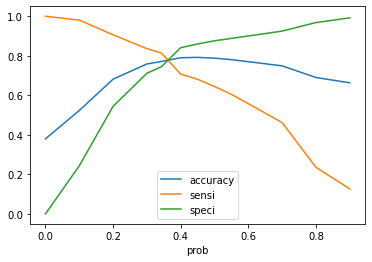

In [67]:
#Plotting 
plt.figure(figsize = (25, 5))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Here the as per the graph the optimal cut off point shows around 34.28865% i.e, around the probablity 0.342886.

In [68]:
# using the optimal cut off point to predict the final_predicted value
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.342886 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,0.0,0.1,0.2,0.3,0.342886,0.4,0.45,0.5,0.55,0.6,0.7,0.8,0.9,final_predicted
0,0,0.721369,1,1,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.187384,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.230631,1,1,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.952438,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.342886,1,1,1,1,1,0,0,0,0,0,0,0,0,1


In [69]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7710295040803515

In [70]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[2944, 1009],
       [ 450, 1969]], dtype=int64)

In [71]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [72]:
#Characteristics on Test dataset in  percentages
print('Sensitivity:' + str(TP/(TP+FN)*100))
print('Specificity:' + str(TN/(TN+FP)*100))
# Precision = TP / TP + FP
print('Precision:'+ str(TP/(TP+FP)*100))
#Recall = TP / TP + FN
print('Recall   :'+ str(TP/(TP+FN)*100))

Sensitivity:81.39727159983464
Specificity:74.47508221603846
Precision:66.11820013431834
Recall   :81.39727159983464


Recall score of train dataset is 81.39%

### 6. Prediction on Test dataset

In [73]:
#transform the test dataset on the trained scale
f_test[nvar]=scaler.transform(f_test[nvar])

In [74]:
#split X and Y
y_test = f_test.pop('Converted')
X_test = f_test

In [75]:
X_test.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview', 'api',
       'landing page submission', 'direct traffic', 'google', 'olark chat',
       'organic search', 'india', 'na_country', 'other_occupation',
       'unemployed', 'na_chosen'],
      dtype='object')

In [76]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test using columns used in the final model dataset
X_test_new = X_test[X.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [77]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_new)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.281086
1,1,0.774699
2,0,0.160604
3,0,0.291323
4,1,0.251863


In [78]:
# Making prediction using cut off 0.342886
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.342886 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.281086,0
1,1,0.774699,1
2,0,0.160604,0
3,0,0.291323,0
4,1,0.251863,0


In [79]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)*100

77.11461003295497

In [80]:
# Creating confusion matrix 
confusion1 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion1

array([[1265,  424],
       [ 201,  841]], dtype=int64)

In [81]:
# Substituting the value of true positive
TP = confusion1[1,1]
# Substituting the value of true negatives
TN = confusion1[0,0]
# Substituting the value of false positives
FP = confusion1[0,1] 
# Substituting the value of false negatives
FN = confusion1[1,0]

In [82]:
#Characteristics on Test dataset in percentages
print('Sensitivity:' + str(TP/(TP+FN)*100))
print('Specificity:' + str(TN/(TN+FP)*100))
# Precision = TP / TP + FP
print('Precision:'+ str(TP/(TP+FP)*100))
#Recall = TP / TP + FN
print('Recall   :'+ str(TP/(TP+FN)*100))

Sensitivity:80.71017274472169
Specificity:74.8963883955003
Precision:66.48221343873519
Recall   :80.71017274472169


Recall Score on test data set is 80.71%

### Generate Score variable in test dataset

In [83]:
# Conversion_prob* 100
y_pred_final['Score'] = y_pred_final['Conversion_Prob']*100
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted,Score
0,0,0.281086,0,28.108597
1,1,0.774699,1,77.469936
2,0,0.160604,0,16.060364
3,0,0.291323,0,29.132285
4,1,0.251863,0,25.186325


<b> NOTE: For the identification of the entry, We can get the Lead Number into the test and train dataset which was dropped prior to the splitting of the dataset. 

# INFERENCES
The model is finalized by the eight variables based on p(below 0.1) and VIF(below 5) values.
The Linear equation used in the Logistic regression model(Sigmoid) is mentioned below.





<b> y = -0.3902 -1.2453 * Do Not Email + 0.8863 * TotalVisits + 4.5590 * Total Time Spent On Website +0.1461 * google - 1.8855 * olark chat + 3.1885 * na_country -1.5633 * unemployed - 2.9543 * na_chosen </b>

The Recall(Lead Conversion rate) Score from the finalized model achieved are <b> 81.39% and 80.71% for the train and test datasets </b> respectively
